# Day and Night Image Classifier
---

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

*Note: All images come from the [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).*


In [1]:
import numpy as np
import cv2
import helpers
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline# Day and Night Image Classifier
---

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

*Note: All images come from the [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).*


### Loading data

In [6]:
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

In [10]:
train_images = helpers.load_dataset(image_dir_training)
test_images = helpers.load_dataset(image_dir_test)

### Standardizing the inputs

In [11]:
standard_train = helpers.standardize(train_images)
standard_test = helpers.standardize(test_images)

### Featurizing the data

In [16]:
# We will convert rgb to hsv inorder to check if there is any possible featurization possible on a sample image

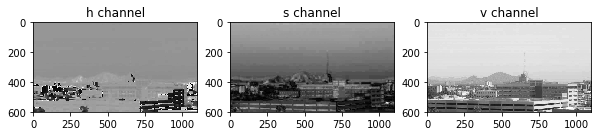

In [25]:
index = np.random.randint(0,len(standard_train))

def rgb2hsv(rgb):
    
    hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
    
    # lets sepearate channels
    
    h = hsv[:,:,0]
    s = hsv[:,:,1]
    v = hsv[:,:,2]
    
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))
    
    ax1.imshow(h, cmap='gray')
    ax1.set_title('h channel')
    
    ax2.imshow(s, cmap='gray')
    ax2.set_title('s channel')
    
    ax3.imshow(v, cmap='gray')
    ax3.set_title('v channel')

rgb2hsv(standard_train[index][0])

In [29]:
# from the above, we can featurize value channel as a bright morning would have different value that of dark night
# We find the average value of all pixels in a image and classify whether it is day or night using value

def avg_brightness(image):
    
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    value_sum = np.sum(hsv[:,:,2])
    
    avg = value_sum/(image.shape[0] * image.shape[1])
    return avg

In [30]:
avg_brightness(standard_train[0][0])

175.1298712121212

### Thresholding and Simple if else classifier

In [34]:
day=0
night=0
crct = 0

for i, val in enumerate(standard_test):
    
    img = standard_test[i][0]
    actual_label = standard_test[i][1]
    
    avg = avg_brightness(img)
    threshold = 100
    
    predicited_class = 0
    
    if avg>=100:
        predicited_class = 1
    
    if predicited_class == 0:
        night+=1
    else:
        day+=1
        
    if predicited_class == actual_label:
        crct += 1
        
print('total number of inputs', len(standard_test))
print('total correct', crct)
print('accuracy on test', crct/(len(standard_test)) * 100)

total number of inputs 160
total correct 148
accuracy on test 92.5
